<a href="https://colab.research.google.com/github/shruthi-nalla/EON/blob/main/YOLO11_Segmentation_Custom_Dataset_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Install All the Ultralytics Package**

In [2]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"


In [3]:
!pip install ultralytics
!pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 45.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 45.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 76.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

**Import All the Required Libraries**

In [4]:
from ultralytics import YOLO
from IPython.display import Image

**Download the Dataset from Roboflow**

In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="WyMSCpYNZ3Ia5CGVTI0Q")
project = rf.workspace("images-vn55x").project("eon-img")
version = project.version(1)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...


In [2]:
dataset.location

'/content/EON-img-1'

**Train the YOLO11 Segmentation Model on a Custom Dataset**

In [5]:
#Load the YOLO11-Seg Model
model = YOLO("yolo11s-seg.pt")

100%|██████████| 19.7M/19.7M [00:00<00:00, 84.9MB/s]


In [6]:
#Train the Model on a Custom Dataset
results = model.train(task='segment', mode = 'train', data = "/content/EON-img-1/data.yaml", epochs = 50)

Ultralytics 8.3.155 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/EON-img-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretra

100%|██████████| 755k/755k [00:00<00:00, 20.5MB/s]

Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  3                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  4                  -1  1    103360  ultralytics.nn.modules.block.C3k2            [128, 256, 1, False, 0.25]    
  5                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  6                  -1  1    346112  ultralytics.nn.modules.block.C3k2            [256, 256, 1, True]           
  7                  -1  1   1180672  ultralytics

 22                  -1  1   1511424  ultralytics.nn.modules.block.C3k2            [768, 512, 1, True]           
 23        [16, 19, 22]  1   1475839  ultralytics.nn.modules.head.Segment          [5, 32, 128, [128, 256, 512]] 
YOLO11s-seg summary: 203 layers, 10,084,223 parameters, 10,084,207 gradients, 35.6 GFLOPs

Transferred 555/561 items from pretrained weights
Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 101MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 648.4±472.2 MB/s, size: 48.9 KB)


train: Scanning /content/EON-img-1/train/labels... 24 images, 0 backgrounds, 0 corrupt: 100%|██████████| 24/24 [00:00<00:00, 905.34it/s]

train: New cache created: /content/EON-img-1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 277.1±150.4 MB/s, size: 49.7 KB)


val: Scanning /content/EON-img-1/valid/labels... 6 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6/6 [00:00<00:00, 416.61it/s]

val: /content/EON-img-1/valid/images/52876927_pdf_page_1_png.rf.9638ea77b64824cb20121b2a52d85084.jpg: 1 duplicate labels removed
val: New cache created: /content/EON-img-1/valid/labels.cache


Plotting labels to runs/segment/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 90 weight(decay=0.0), 101 weight(decay=0.0005), 100 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/50      5.17G      2.075      4.144      3.971      1.713        192        640: 100%|██████████| 2/2 [00:03<00:00,  1.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.36it/s]

                   all          6         60    0.00044    0.00962   0.000229   6.86e-05          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/50      5.19G      2.022       4.26       3.96      1.701        150        640: 100%|██████████| 2/2 [00:01<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.56it/s]

                   all          6         60   0.000442    0.00962   0.000231   6.93e-05          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/50      5.22G      1.907      4.595      3.957      1.658        136        640: 100%|██████████| 2/2 [00:01<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.35it/s]

                   all          6         60     0.0739      0.256     0.0666     0.0354     0.0733      0.247     0.0642     0.0271



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/50      5.29G      1.558      3.277      3.516      1.532        103        640: 100%|██████████| 2/2 [00:00<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.69it/s]

                   all          6         60      0.236      0.317       0.23      0.161      0.226      0.307      0.223      0.135



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/50      5.33G      1.291      2.238      2.745      1.288        103        640: 100%|██████████| 2/2 [00:00<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.09it/s]

                   all          6         60      0.661      0.182      0.201       0.14      0.657      0.173      0.186      0.105



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/50      5.37G      1.285      2.265       2.39      1.248        195        640: 100%|██████████| 2/2 [00:00<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.16it/s]


                   all          6         60      0.424      0.393      0.271      0.205      0.419      0.374      0.252      0.159

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/50      5.42G      1.217      2.201       2.03       1.26        139        640: 100%|██████████| 2/2 [00:00<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.46it/s]

                   all          6         60       0.65      0.257       0.24      0.152       0.65      0.257      0.223      0.117



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/50      5.46G       1.12       1.97      1.851      1.198         81        640: 100%|██████████| 2/2 [00:00<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.46it/s]

                   all          6         60      0.474       0.32      0.258      0.172      0.485      0.319      0.256      0.139



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/50      5.51G      1.117      1.987      1.633      1.168        121        640: 100%|██████████| 2/2 [00:00<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.99it/s]

                   all          6         60       0.59      0.305      0.311      0.219      0.638        0.3      0.308      0.181



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/50      5.55G      1.106      1.941      1.521      1.125        108        640: 100%|██████████| 2/2 [00:00<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.81it/s]

                   all          6         60      0.533      0.352      0.335       0.24      0.541      0.361      0.345      0.199



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/50      5.59G      1.221      2.206      1.679      1.213         74        640: 100%|██████████| 2/2 [00:00<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.03it/s]

                   all          6         60      0.572      0.261      0.386      0.261      0.508      0.353       0.39      0.217



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/50      5.64G      1.051      1.702      1.356       1.09         88        640: 100%|██████████| 2/2 [00:00<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.74it/s]

                   all          6         60       0.73      0.371      0.442      0.286      0.715       0.36       0.43      0.245



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/50      5.69G      1.098      1.736      1.542      1.137         68        640: 100%|██████████| 2/2 [00:00<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.05it/s]

                   all          6         60      0.714      0.292      0.359      0.249      0.713      0.327      0.367      0.219



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/50      5.73G       1.05      1.684      1.258      1.058        184        640: 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.65it/s]

                   all          6         60       0.57      0.356      0.363      0.249      0.556      0.385      0.365      0.209



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/50      5.77G     0.9889      1.772      1.244      1.068        110        640: 100%|██████████| 2/2 [00:00<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.83it/s]

                   all          6         60       0.67      0.301      0.384      0.249      0.576      0.364      0.379      0.197



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/50      5.81G     0.9933      1.538      1.237      1.073        120        640: 100%|██████████| 2/2 [00:00<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.54it/s]

                   all          6         60      0.677      0.348      0.498      0.314      0.668       0.34      0.477      0.192



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/50      5.86G      1.042      1.774      1.358      1.109         89        640: 100%|██████████| 2/2 [00:00<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]

                   all          6         60      0.572      0.425      0.613      0.384      0.577      0.439      0.602      0.201



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/50       5.9G      0.979      1.585      1.166      1.046        133        640: 100%|██████████| 2/2 [00:00<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.66it/s]

                   all          6         60      0.573      0.407      0.445      0.301      0.566      0.398      0.344      0.185



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/50      5.95G     0.9854      1.569      1.144      1.049         94        640: 100%|██████████| 2/2 [00:00<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.71it/s]

                   all          6         60      0.661      0.382      0.446      0.291      0.661      0.382       0.38      0.215



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/50      5.99G     0.9482      1.519       1.11      1.052        119        640: 100%|██████████| 2/2 [00:00<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.47it/s]

                   all          6         60      0.753      0.412      0.467       0.31      0.742      0.379      0.387       0.22



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/50      6.03G     0.9705      1.477       1.05      1.024        143        640: 100%|██████████| 2/2 [00:00<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.94it/s]

                   all          6         60      0.753      0.425      0.515      0.325      0.764      0.412      0.382      0.197



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/50      6.08G     0.9341      1.497      1.101      1.054        108        640: 100%|██████████| 2/2 [00:00<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.30it/s]

                   all          6         60      0.748      0.414      0.522      0.307      0.751      0.395      0.407      0.207



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/50      6.12G     0.9681      1.591       1.05      1.064        143        640: 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.87it/s]

                   all          6         60      0.725      0.422       0.43      0.285      0.733      0.408      0.408       0.23



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/50      6.16G     0.9545      1.293       1.04      1.091         82        640: 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.06it/s]

                   all          6         60      0.747      0.431        0.4      0.262      0.747      0.429      0.392       0.22



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/50      6.21G     0.9781      1.573      1.031      1.097         97        640: 100%|██████████| 2/2 [00:00<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.96it/s]

                   all          6         60      0.741      0.319      0.365      0.235      0.721        0.3      0.347      0.199



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      26/50      6.28G     0.9581        1.6     0.9594      1.016        197        640: 100%|██████████| 2/2 [00:00<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.89it/s]

                   all          6         60      0.761      0.321      0.371      0.236      0.734      0.302      0.342      0.192



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      27/50      6.34G      0.961      1.471     0.9393      1.047        117        640: 100%|██████████| 2/2 [00:01<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.03it/s]

                   all          6         60      0.724      0.354      0.362      0.238      0.704      0.335      0.337       0.19



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      28/50      6.38G     0.9789      1.485     0.9819      1.049        155        640: 100%|██████████| 2/2 [00:00<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.85it/s]

                   all          6         60      0.724      0.354      0.362      0.238      0.704      0.335      0.337       0.19



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      29/50       6.4G     0.9724       1.55     0.9315      1.044        141        640: 100%|██████████| 2/2 [00:00<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.33it/s]

                   all          6         60      0.759      0.361      0.376      0.233       0.74      0.342      0.359      0.197



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      30/50      6.56G     0.8722      1.333     0.9572      1.027         68        640: 100%|██████████| 2/2 [00:00<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.81it/s]

                   all          6         60      0.628      0.442      0.391      0.229      0.615       0.42      0.378      0.204



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      31/50       6.6G     0.8831      1.483     0.9567      1.028         70        640: 100%|██████████| 2/2 [00:00<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.93it/s]

                   all          6         60      0.628      0.442      0.391      0.229      0.615       0.42      0.378      0.204



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      32/50      6.62G     0.8851      1.266     0.8692     0.9977        118        640: 100%|██████████| 2/2 [00:00<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.85it/s]

                   all          6         60      0.576      0.429       0.39      0.231      0.811      0.284      0.379      0.209



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      33/50      6.69G     0.8807      1.235     0.8942      1.009         92        640: 100%|██████████| 2/2 [00:00<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.02it/s]

                   all          6         60      0.557      0.423      0.399      0.246      0.723      0.278      0.382      0.232



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      34/50      6.76G     0.9042      1.389     0.9199      1.016        134        640: 100%|██████████| 2/2 [00:00<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.03it/s]

                   all          6         60      0.557      0.423      0.399      0.246      0.723      0.278      0.382      0.232



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      35/50      6.79G     0.9614      1.467     0.9554      1.055        114        640: 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.84it/s]

                   all          6         60      0.842      0.295      0.402      0.251      0.823      0.285      0.394      0.225



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      36/50      6.97G     0.9111      1.306     0.8418      1.023        153        640: 100%|██████████| 2/2 [00:01<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.24it/s]

                   all          6         60      0.719       0.36      0.397      0.256      0.741      0.319      0.374       0.22



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      37/50      7.02G     0.8272      1.214     0.8273     0.9818        143        640: 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.65it/s]


                   all          6         60      0.719       0.36      0.397      0.256      0.741      0.319      0.374       0.22

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      38/50      7.04G     0.8486      1.279     0.8784      1.006         82        640: 100%|██████████| 2/2 [00:00<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.43it/s]

                   all          6         60      0.701       0.31      0.376       0.23      0.603      0.349      0.355      0.197



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      39/50      7.18G     0.8611       1.28     0.7895     0.9784        159        640: 100%|██████████| 2/2 [00:00<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.98it/s]

                   all          6         60      0.755      0.274      0.339      0.228      0.756      0.288      0.345      0.205



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      40/50      7.22G     0.7336      1.163     0.7037     0.9637         98        640: 100%|██████████| 2/2 [00:00<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.18it/s]

                   all          6         60      0.755      0.274      0.339      0.228      0.756      0.288      0.345      0.205


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      41/50      7.25G     0.7971      1.143     0.7809     0.9629         83        640: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.50it/s]

                   all          6         60      0.578      0.373      0.331      0.232      0.577      0.373      0.333      0.201



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      42/50      7.31G     0.7829      1.133     0.7281     0.9681         63        640: 100%|██████████| 2/2 [00:00<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.33it/s]

                   all          6         60      0.755      0.339      0.348      0.235      0.741      0.329      0.341      0.201



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      43/50      7.36G     0.7687      1.126     0.7164     0.9649         65        640: 100%|██████████| 2/2 [00:00<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.97it/s]

                   all          6         60      0.755      0.339      0.348      0.235      0.741      0.329      0.341      0.201



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      44/50       7.4G     0.7557      1.141     0.6771     0.9932         78        640: 100%|██████████| 2/2 [00:00<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.70it/s]

                   all          6         60       0.38      0.355      0.323      0.223      0.363      0.337      0.305      0.181



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      45/50      5.45G     0.7435      1.067     0.7389     0.9632         55        640: 100%|██████████| 2/2 [00:00<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.75it/s]

                   all          6         60       0.38      0.355      0.323      0.223      0.363      0.337      0.305      0.181



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      46/50      5.45G     0.7705      1.158     0.7845     0.9225         74        640: 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.14it/s]

                   all          6         60      0.756      0.331      0.353      0.248      0.748      0.323      0.341      0.215



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      47/50      5.45G     0.7133      1.006     0.7378     0.9343         90        640: 100%|██████████| 2/2 [00:00<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.62it/s]

                   all          6         60      0.756      0.331      0.353      0.248      0.748      0.323      0.341      0.215



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      48/50      5.45G     0.7605      1.089     0.7368     0.9625         82        640: 100%|██████████| 2/2 [00:00<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.84it/s]

                   all          6         60       0.84      0.342      0.372      0.258      0.831      0.333       0.36      0.223



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      49/50      5.45G     0.6957      0.989     0.6627     0.9227         68        640: 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.33it/s]

                   all          6         60       0.84      0.342      0.372      0.258      0.831      0.333       0.36      0.223



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      50/50      5.45G     0.7273      1.107     0.7082     0.9237         68        640: 100%|██████████| 2/2 [00:00<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.04it/s]

                   all          6         60      0.864      0.341      0.381      0.264      0.854      0.333       0.37      0.229



50 epochs completed in 0.023 hours.
Optimizer stripped from runs/segment/train/weights/last.pt, 20.5MB
Optimizer stripped from runs/segment/train/weights/best.pt, 20.5MB

Validating runs/segment/train/weights/best.pt...
Ultralytics 8.3.155 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s-seg summary (fused): 113 layers, 10,068,751 parameters, 0 gradients, 35.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.45it/s]


                   all          6         60      0.573      0.426      0.613      0.384      0.576      0.439      0.602      0.201
                 Brick          6         26      0.261      0.385      0.258      0.138      0.307      0.462      0.272      0.108
                  Door          4          4      0.395      0.492      0.392      0.321      0.389        0.5      0.392      0.121
                 Stone          1          1          1          0      0.995      0.497          1          0      0.995      0.102
                Window          6         29      0.635      0.828      0.808      0.578      0.606      0.793      0.749      0.473
Speed: 0.2ms preprocess, 10.3ms inference, 0.0ms loss, 8.4ms postprocess per image
Results saved to runs/segment/train


**Examining Results**

**Box and Mask Curves of Precision-Confidence and Recall - Confidence**

In [7]:
train_path = "/content/runs/segment/train"

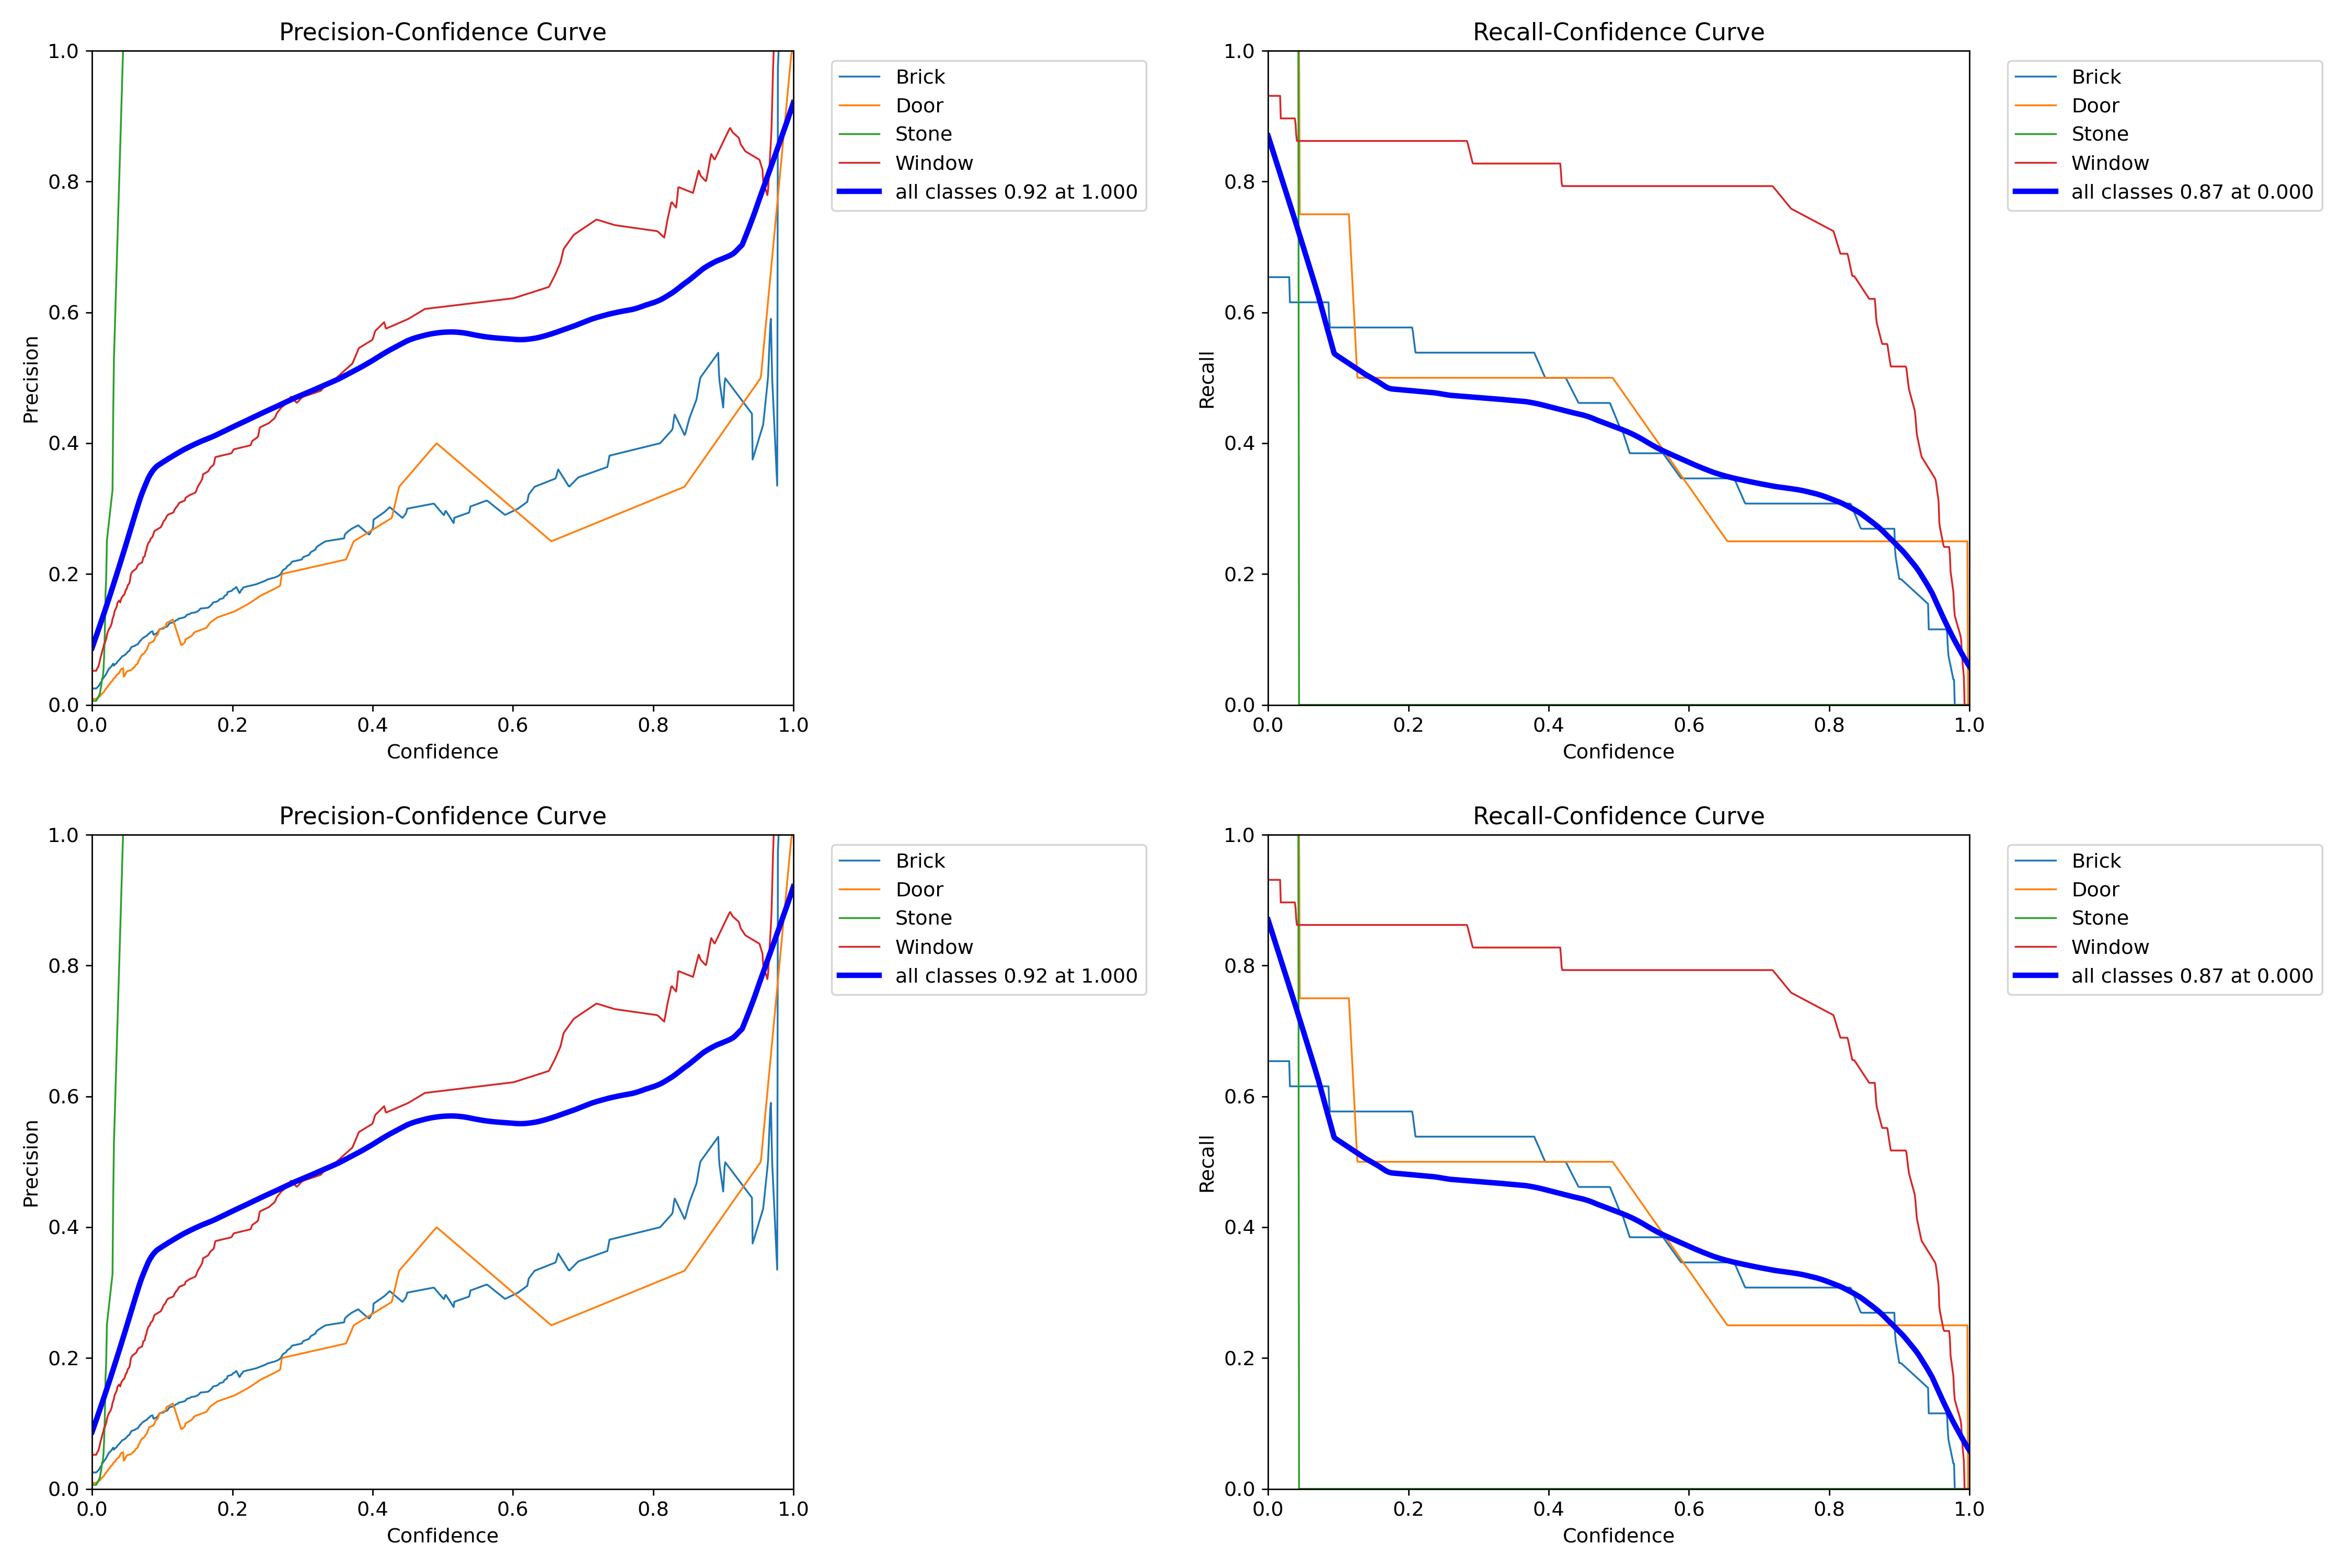

In [13]:
# !ls /content/runs/segment/train/
import cv2
import os
from google.colab.patches import cv2_imshow

#Load your images using OpenCV
# Updated paths to use Mask curves instead of Box curves
img1_path = f"{train_path}/MaskP_curve.png"
img2_path = f"{train_path}/MaskR_curve.png"
img3_path = f"{train_path}/MaskP_curve.png" # Keep MaskP for consistency in concatenation
img4_path = f"{train_path}/MaskR_curve.png" # Keep MaskR for consistency in concatenation


# Check if image files exist before reading
if not os.path.exists(img1_path):
    print(f"Error: {img1_path} not found.")
    img1 = None
else:
    img1 = cv2.imread(img1_path)

if not os.path.exists(img2_path):
    print(f"Error: {img2_path} not found.")
    img2 = None
else:
    img2 = cv2.imread(img2_path)

if not os.path.exists(img3_path):
    print(f"Error: {img3_path} not found.")
    img3 = None
else:
    img3 = cv2.imread(img3_path)

if not os.path.exists(img4_path):
    print(f"Error: {img4_path} not found.")
    img4 = None
else:
    img4 = cv2.imread(img4_path)


# Proceed with concatenation only if all images were loaded successfully
if img1 is not None and img2 is not None and img3 is not None and img4 is not None:
    #Concatenate the images horizontally
    top_row = cv2.hconcat([img1, img2])
    botton_row = cv2.hconcat([img3, img4])

    #Concatenate the two rows vertically
    grid = cv2.vconcat([top_row, botton_row])
    #Display the concatenated images
    cv2_imshow(grid)
else:
    print("Could not load all images. Please check the file paths and ensure the training generated the expected files.")


**Confusion Matrix**

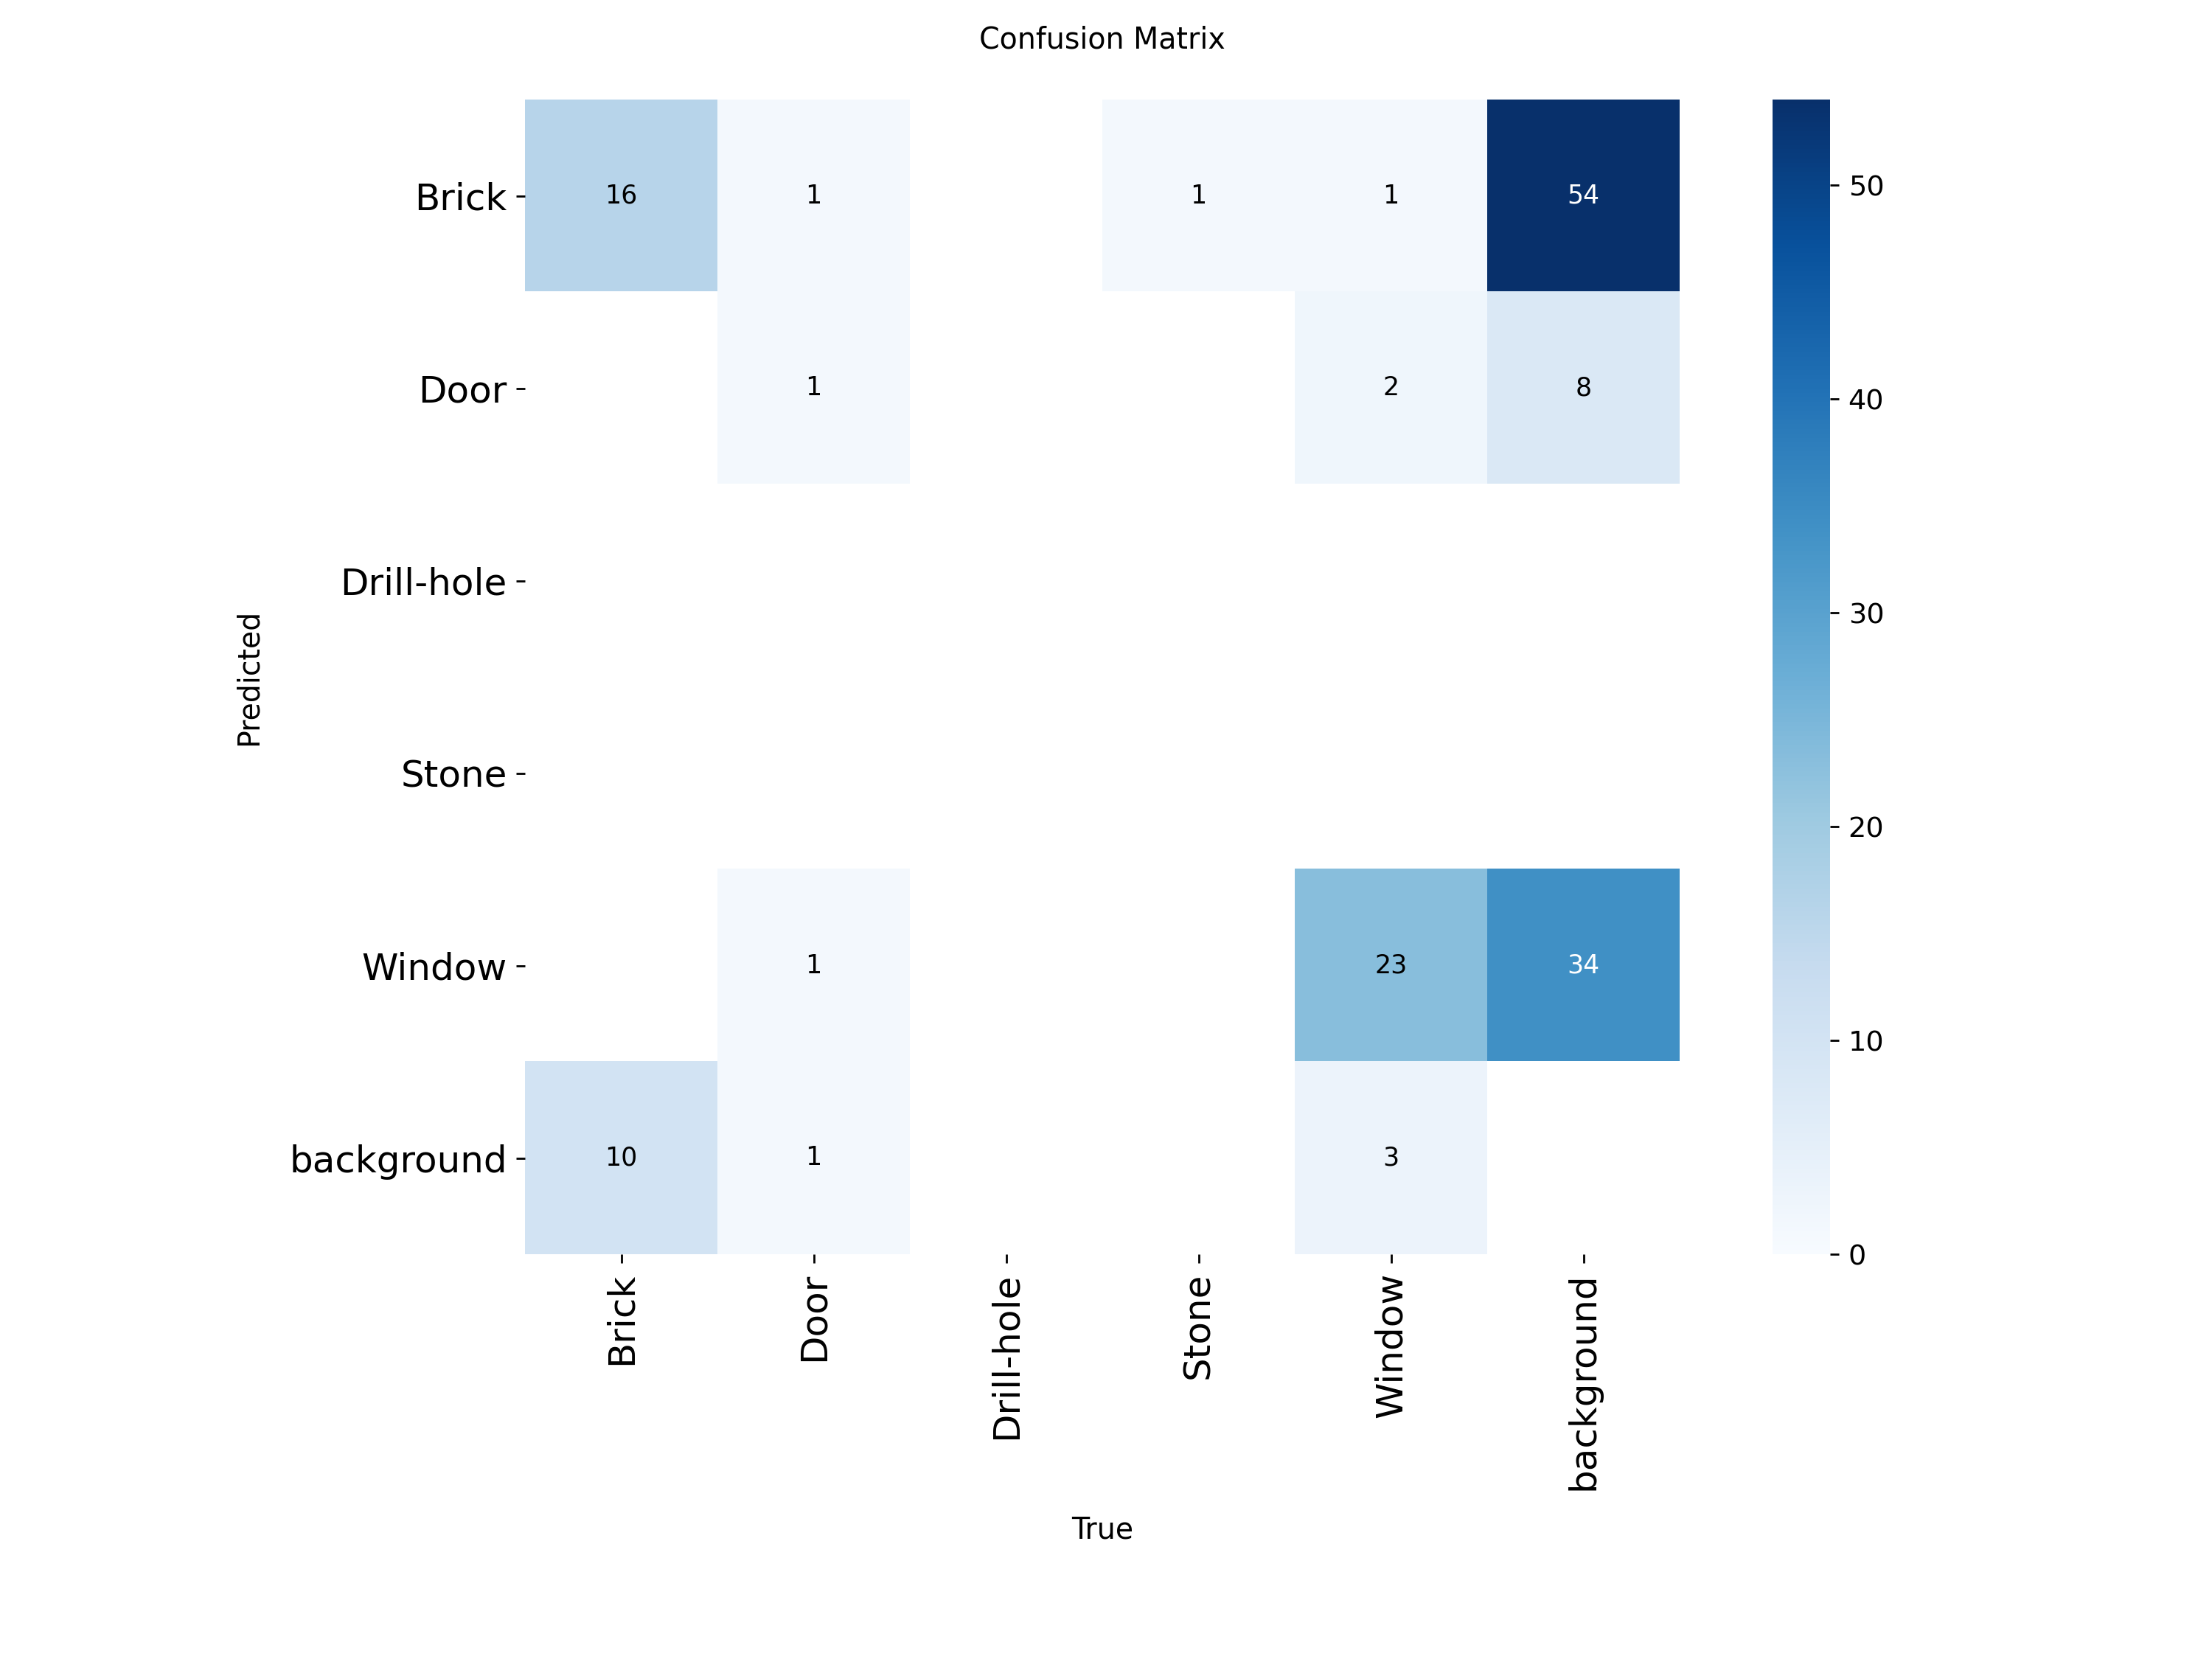

In [14]:
Image("/content/runs/segment/train/confusion_matrix.png", width = 800)

**Normalized Confusion Matrix**

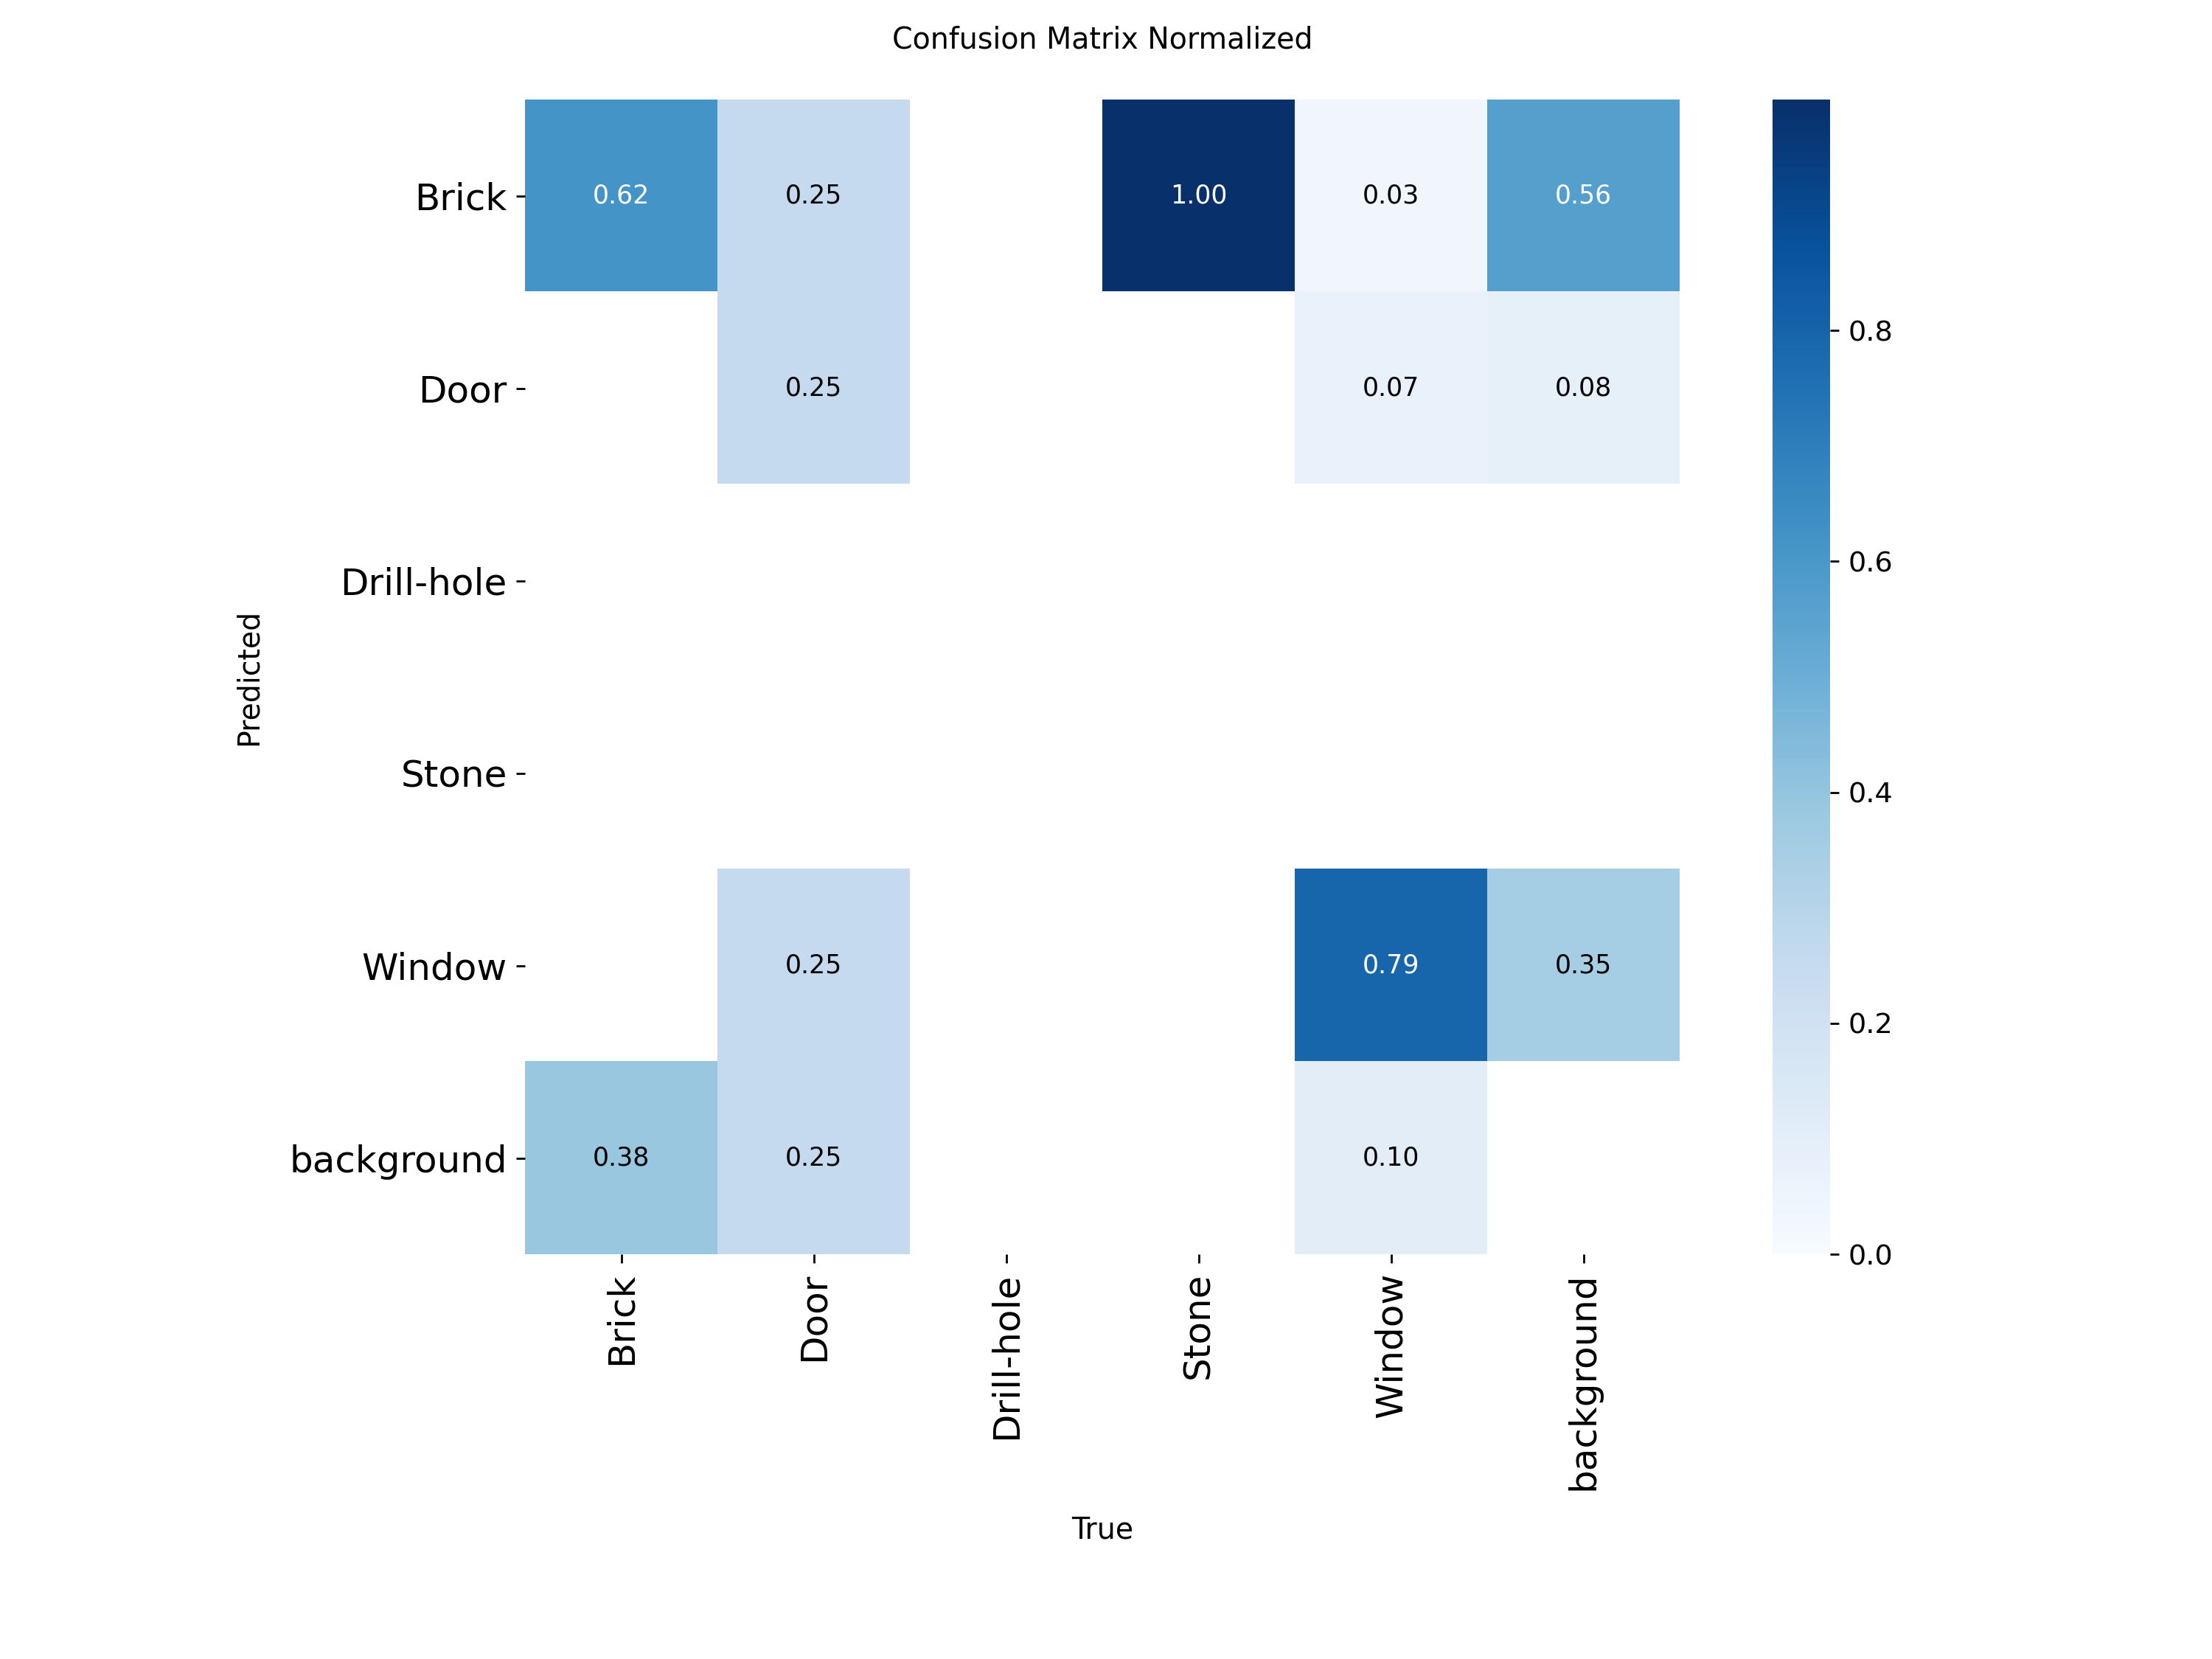

In [15]:
Image("/content/runs/segment/train/confusion_matrix_normalized.png", width = 800)

**Model Prediction on Validation Batch**

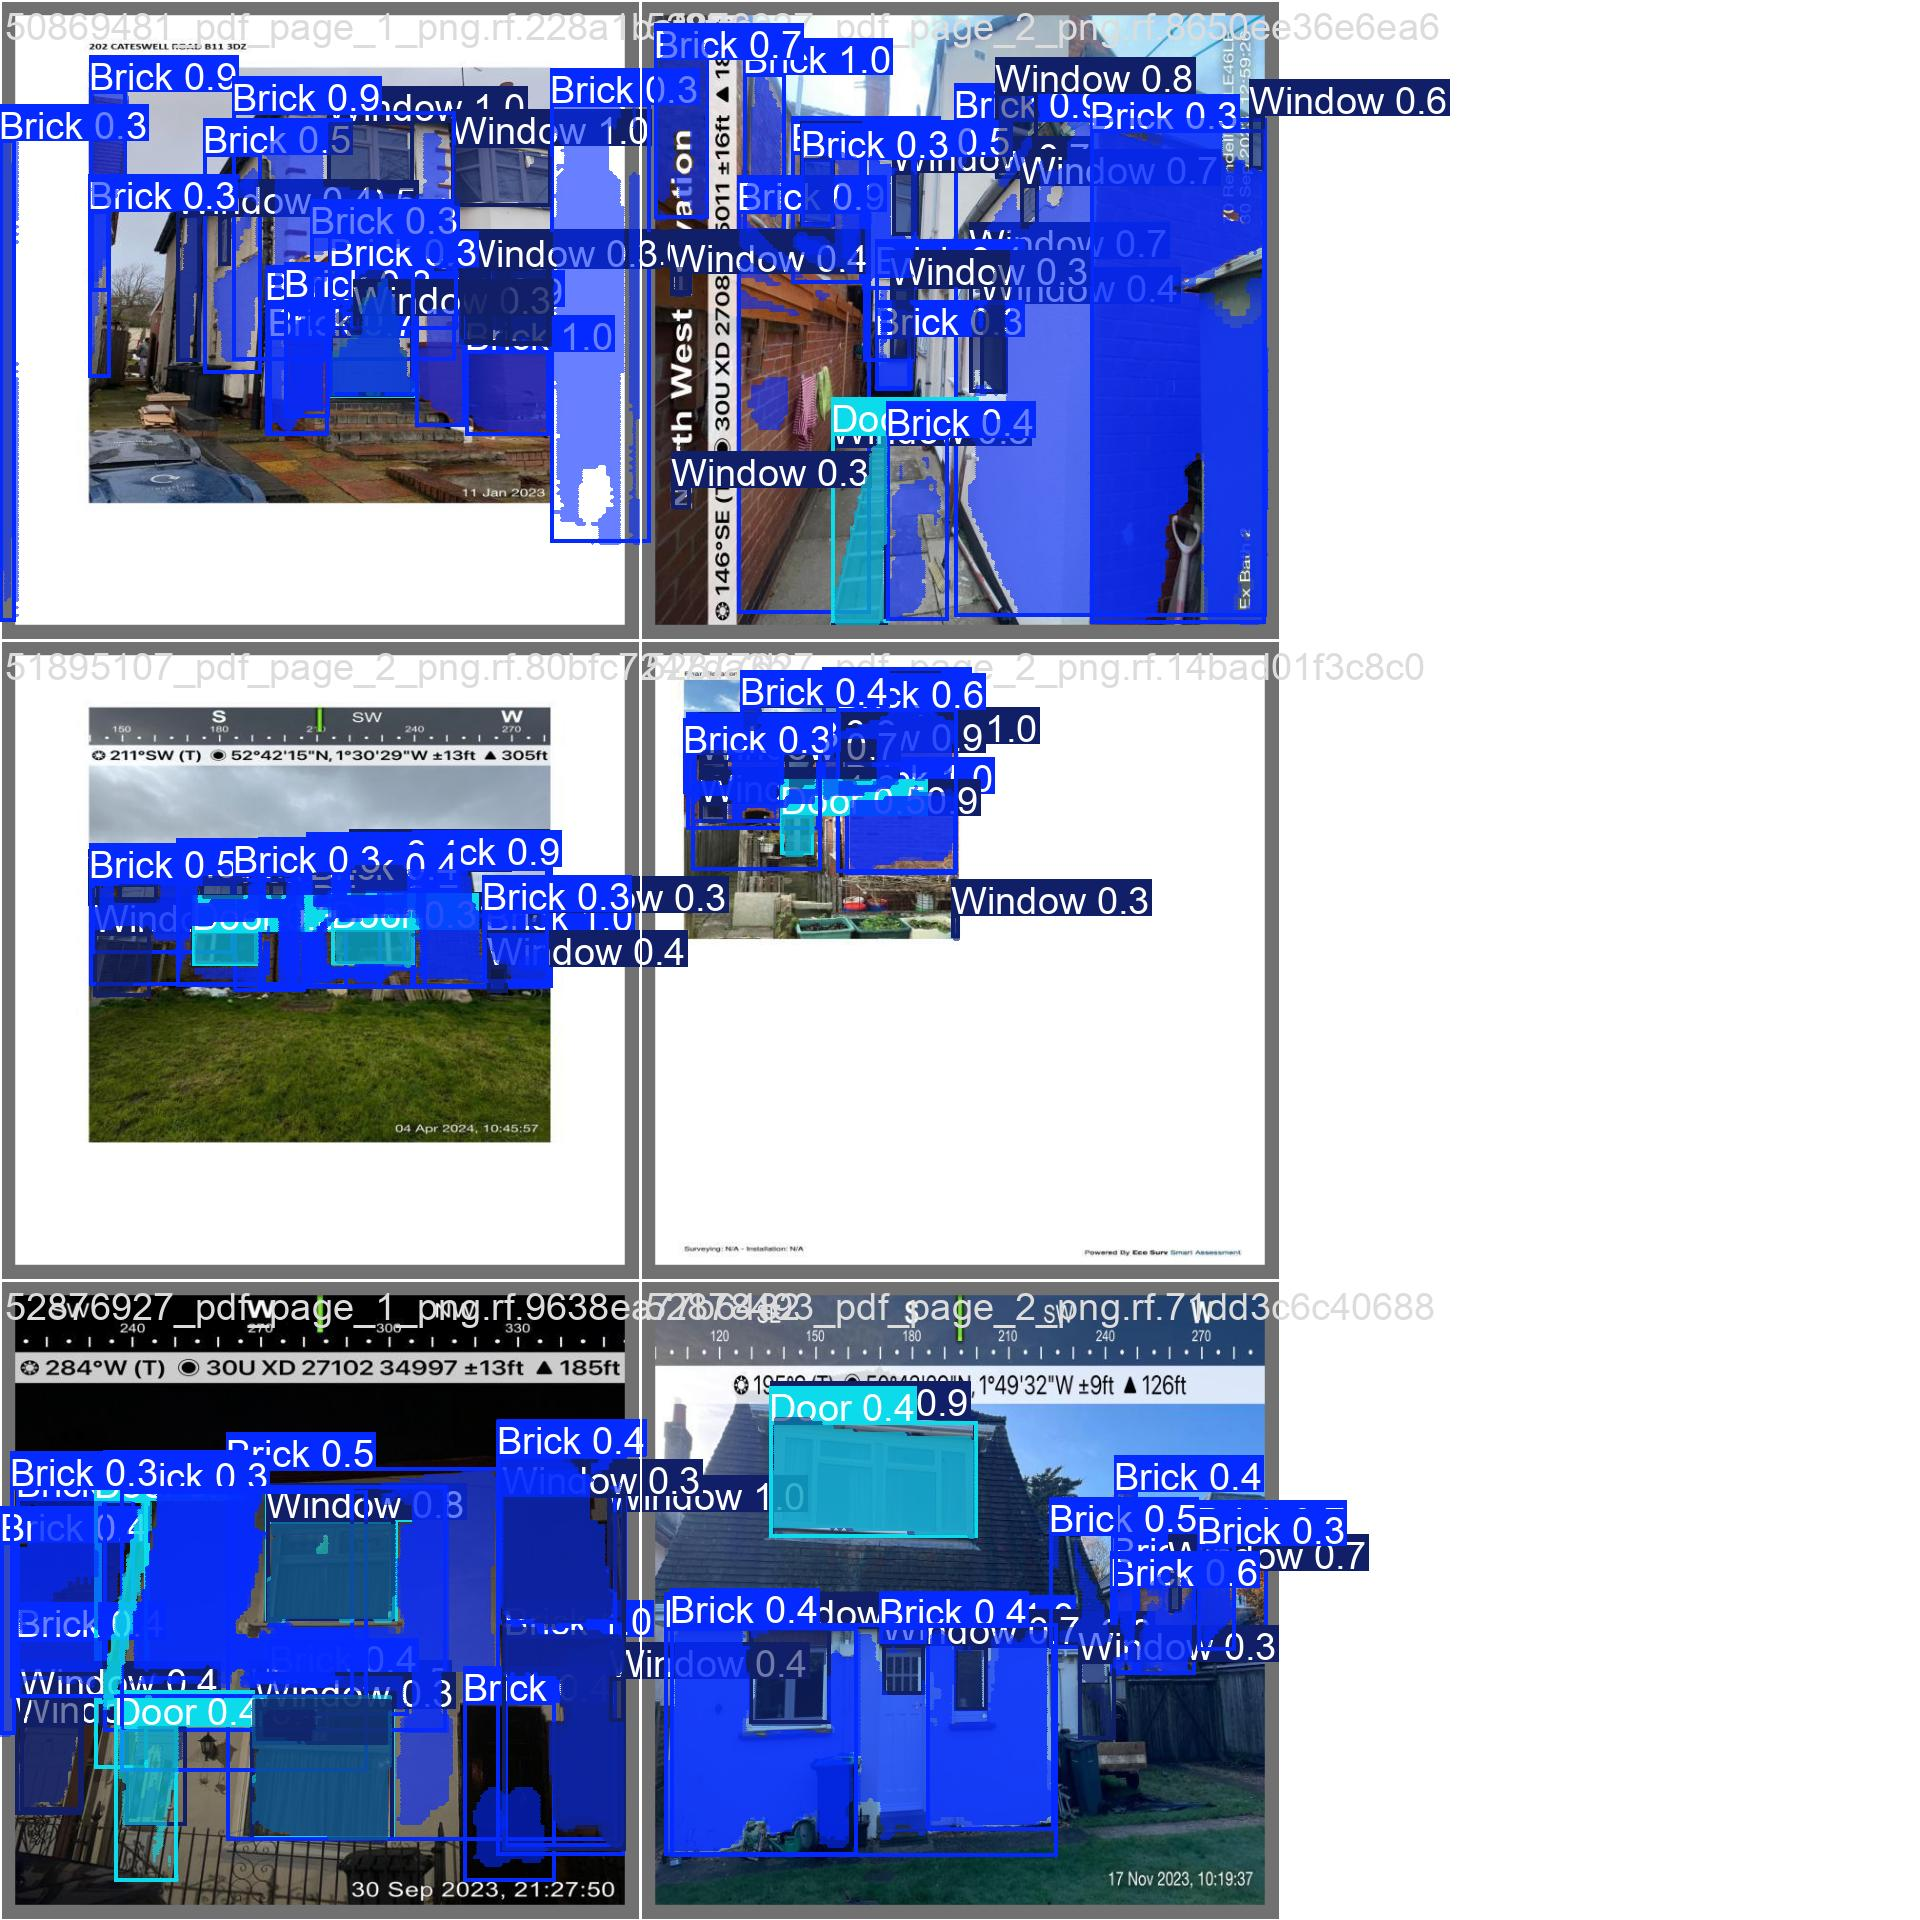

In [16]:
Image("/content/runs/segment/train/val_batch0_pred.jpg", width = 800)

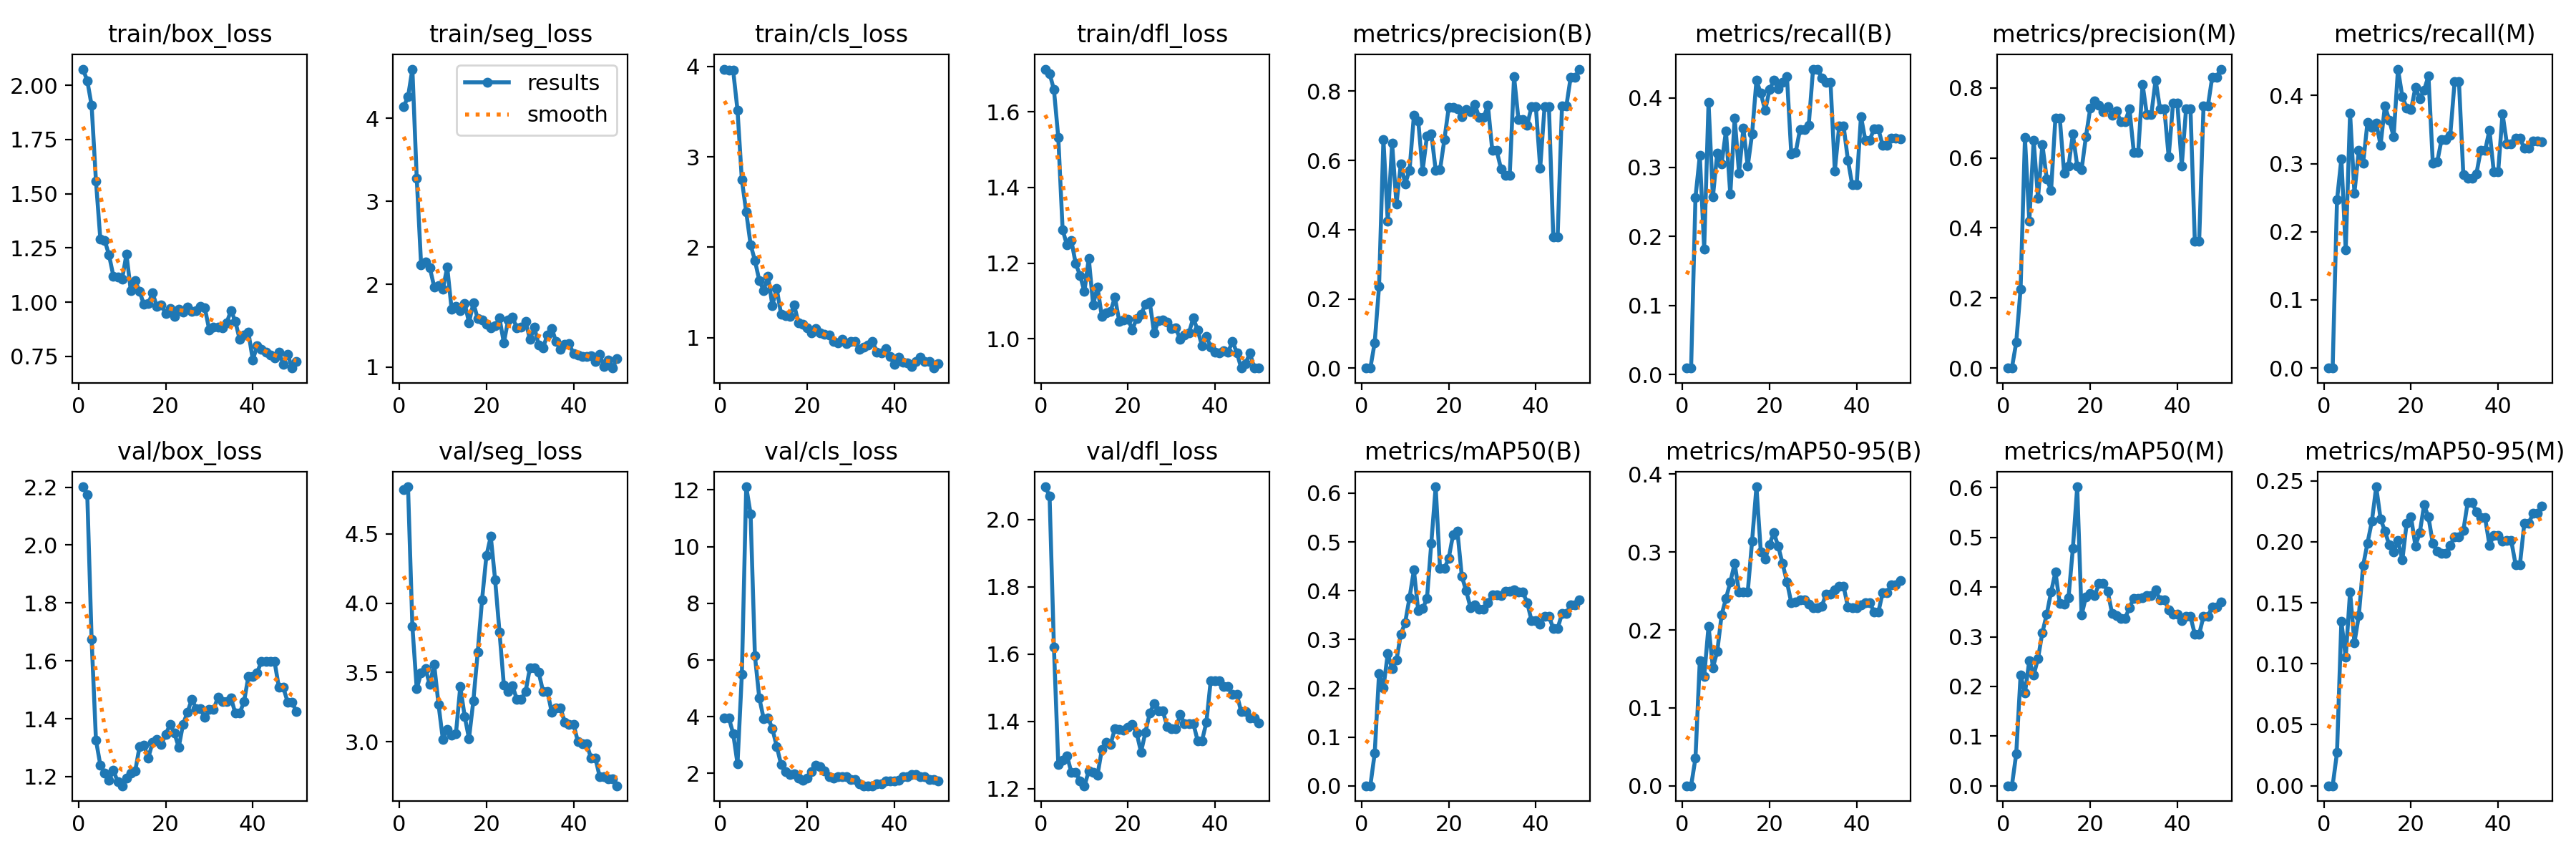

In [17]:
Image("/content/runs/segment/train/results.png", width = 800)

**Validate Fine-Tuned Model**

In [18]:
metrics = model.val()
# Print the evaluation metrics
print("Model Evaluation Metrics:", metrics)


Ultralytics 8.3.155 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s-seg summary (fused): 113 layers, 10,068,751 parameters, 0 gradients, 35.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 864.5±410.5 MB/s, size: 49.7 KB)


val: Scanning /content/EON-img-1/valid/labels.cache... 6 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6/6 [00:00<?, ?it/s]

val: /content/EON-img-1/valid/images/52876927_pdf_page_1_png.rf.9638ea77b64824cb20121b2a52d85084.jpg: 1 duplicate labels removed



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.05it/s]


                   all          6         60      0.572      0.425      0.613      0.385      0.577      0.439      0.603      0.196
                 Brick          6         26       0.26      0.385      0.257      0.137      0.307      0.462      0.272      0.107
                  Door          4          4      0.393      0.489      0.392      0.322      0.392        0.5      0.392      0.121
                 Stone          1          1          1          0      0.995      0.497          1          0      0.995      0.102
                Window          6         29      0.635      0.828      0.808      0.583      0.607      0.793      0.754      0.456
Speed: 1.7ms preprocess, 43.8ms inference, 0.0ms loss, 11.6ms postprocess per image
Results saved to runs/segment/train2
Model Evaluation Metrics: ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0, 1, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metr

**Inference on Test Dataset Images**

In [19]:
#Predict on Test Images using Trained Model
import os

#Load Trained Model
model = YOLO("/content/runs/segment/train/weights/best.pt")

#Specify the test folder path
test_path = "/content/EON-img-1/test/images"

#List all images in the test folder
image_files = [os.path.join(test_path, f) for f in os.listdir(test_path) if f.endswith(('.jpg', '.jpeg', '.png'))]

#Predict each images
for img_path in image_files:
  results = model.predict(source = img_path, save = True, conf = 0.20)


image 1/1 /content/EON-img-1/test/images/52914814_pdf_page_1_png.rf.113427b9d710ae0a7eae39619f6554fa.jpg: 640x640 23 Bricks, 2 Doors, 14 Windows, 20.3ms
Speed: 2.3ms preprocess, 20.3ms inference, 22.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict

image 1/1 /content/EON-img-1/test/images/52913186_pdf_page_2_png.rf.f22b5b3895f130723ad9aeddea2be9db.jpg: 640x640 10 Bricks, 13 Windows, 20.2ms
Speed: 1.9ms preprocess, 20.2ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict

image 1/1 /content/EON-img-1/test/images/52913186_pdf_page_1_png.rf.bedfa01e80bd37157f2d8448f39a1c2c.jpg: 640x640 21 Bricks, 2 Doors, 13 Windows, 20.2ms
Speed: 1.7ms preprocess, 20.2ms inference, 4.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict

image 1/1 /content/EON-img-1/test/images/52864356_pdf_page_1_png.rf.3861ba38cf55c6394bb75b5e97bc85fb.jpg: 640x640 32 Bricks, 3 Doors, 28 Win

**Plot Prediction on Test Images**

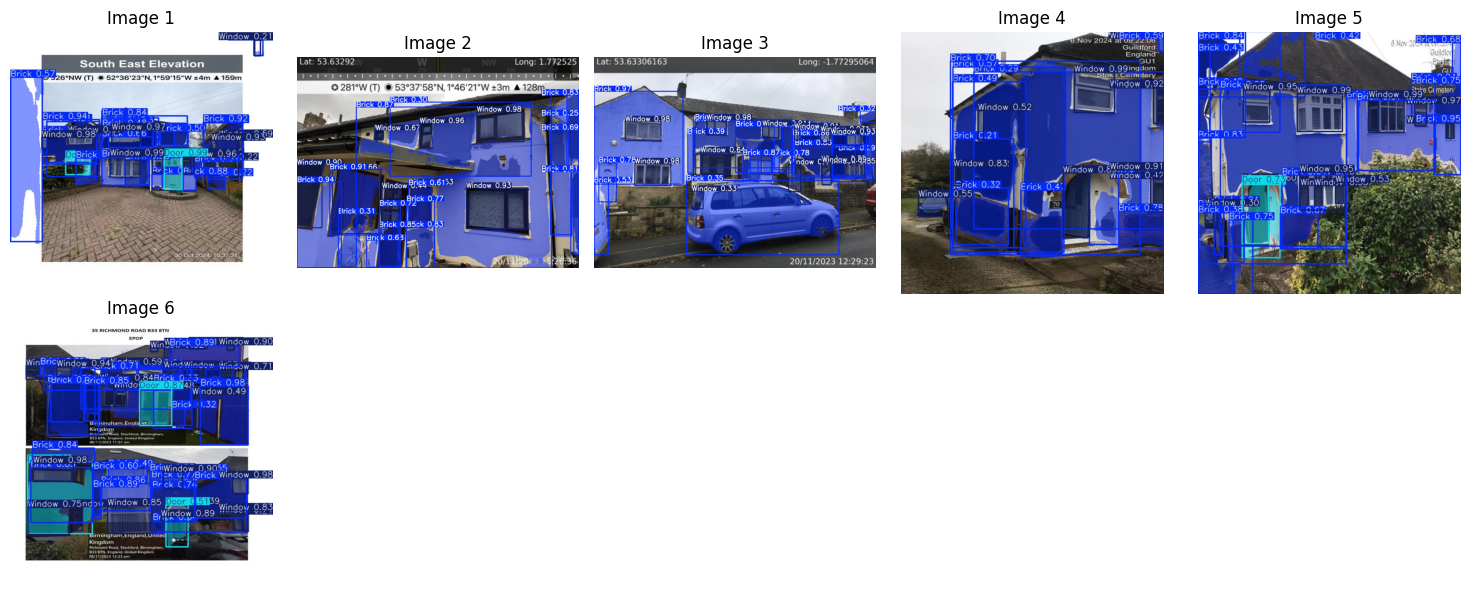

In [26]:
# Plot prediction on test images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
# Specify the predict folder path
pred_path = '/content/runs/segment/predict'

# List all images in the predict folder
pred_image_files = [os.path.join(pred_path, img) for img in os.listdir(pred_path) if img.endswith(('.jpg', '.jpeg', '.png'))]

# Number of images per row
images_per_row = 5

# Calculate the number of rows needed
n_rows = len(pred_image_files) // images_per_row + int(len(pred_image_files) % images_per_row != 0)

# Set figure size
fig, axs = plt.subplots(n_rows, images_per_row, figsize=(15, 3 * n_rows))

# Flatten axes if necessary (for easier iteration)
axs = axs.flatten()

# Loop through each image and display it
for i, img_path in enumerate(pred_image_files):
    img = mpimg.imread(img_path)      # Read the image
    axs[i].imshow(img)                # Show the image
    axs[i].axis('off')                # Turn off axis
    axs[i].set_title(f"Image {i+1}")  # Add title

# Hide any extra empty subplots (if the number of images is not a perfect multiple of images_per_row)
for j in range(i+1, len(axs)):
    axs[j].axis('off')  # Hide unused axes

# Display all images
plt.tight_layout()
plt.show()

**Inference on a Sample Images**

In [21]:
!mkdir /content/my_new_images

In [22]:
results = model.predict(source = "/content/my_new_images/52877324.pdf_page_2.png", save = True, conf = 0.25)


image 1/1 /content/my_new_images/52877324.pdf_page_2.png: 480x640 27 Bricks, 13 Windows, 62.9ms
Speed: 3.4ms preprocess, 62.9ms inference, 4.0ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/segment/predict


In [24]:
results = model.predict(source = "/content/my_new_images/52877324.pdf_page_3.png", save = True, conf = 0.25)


image 1/1 /content/my_new_images/52877324.pdf_page_3.png: 480x640 18 Bricks, 9 Windows, 16.3ms
Speed: 3.4ms preprocess, 16.3ms inference, 3.5ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/segment/predict
